<a href="https://colab.research.google.com/github/maghfirakhansaaulia/013_Maghfira-Khansa-Aulia_PostTest-2-Data-Mining/blob/main/013_Maghfira_Khansa_Aulia_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [22]:
import pandas as pd
df = pd.read_excel('Dataset_Temp.xlsx')
df

,Whole Milk,Pastry,Salty Snack,Sausage,Semi-Finished Bread,Yogurt,Soda,pickled vegetables,canned beer,misc beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 1 Item set
df.sum()

Whole Milk             5
Pastry                 1
Salty Snack            1
Sausage                4
Semi-Finished Bread    1
Yogurt                 1
Soda                   3
pickled vegetables     1
canned beer            1
misc beverages         1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [6]:
# Itemnya ada apa aja si
df.columns

Index(['Whole Milk', 'Pastry', 'Salty Snack ', 'Sausage',
       'Semi-Finished Bread', 'Yogurt', 'Soda', 'pickled vegetables',
       'canned beer', 'misc beverages', 'hygiene articles', 'rolls/buns',
       'frankfurter', 'whipped/sour cream', 'curd', 'beef', 'white bread',
       'butter', 'frozen vegetables', 'other vegetables', 'tropical fruit',
       'sugar', 'butter milk', 'specialty chocolate', 'frozen meals',
       'dental care', 'root vegetables', 'detergent', 'dish cleaner',
       'cling film/bags'],
      dtype='object')

In [7]:
# 2 Item set
from itertools import permutations #Library untuk buat kombinasi barang
# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('Whole Milk', 'Pastry'),
 ('Whole Milk', 'Salty Snack '),
 ('Whole Milk', 'Sausage'),
 ('Whole Milk', 'Semi-Finished Bread'),
 ('Whole Milk', 'Yogurt'),
 ('Whole Milk', 'Soda'),
 ('Whole Milk', 'pickled vegetables'),
 ('Whole Milk', 'canned beer'),
 ('Whole Milk', 'misc beverages'),
 ('Whole Milk', 'hygiene articles'),
 ('Whole Milk', 'rolls/buns'),
 ('Whole Milk', 'frankfurter'),
 ('Whole Milk', 'whipped/sour cream'),
 ('Whole Milk', 'curd'),
 ('Whole Milk', 'beef'),
 ('Whole Milk', 'white bread'),
 ('Whole Milk', 'butter'),
 ('Whole Milk', 'frozen vegetables'),
 ('Whole Milk', 'other vegetables'),
 ('Whole Milk', 'tropical fruit'),
 ('Whole Milk', 'sugar'),
 ('Whole Milk', 'butter milk'),
 ('Whole Milk', 'specialty chocolate'),
 ('Whole Milk', 'frozen meals'),
 ('Whole Milk', 'dental care'),
 ('Whole Milk', 'root vegetables'),
 ('Whole Milk', 'detergent'),
 ('Whole Milk', 'dish cleaner'),
 ('Whole Milk', 'cling film/bags'),
 ('Pastry', 'Whole Milk'),
 ('Pastry', 'Salty Snack '),
 (

In [8]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('Whole Milk', 'Pastry'),
 ('Whole Milk', 'Salty Snack '),
 ('Whole Milk', 'Sausage'),
 ('Whole Milk', 'Semi-Finished Bread'),
 ('Whole Milk', 'Yogurt'),
 ('Whole Milk', 'Soda'),
 ('Whole Milk', 'rolls/buns'),
 ('Whole Milk', 'butter'),
 ('Pastry', 'Whole Milk'),
 ('Pastry', 'Salty Snack '),
 ('Salty Snack ', 'Whole Milk'),
 ('Salty Snack ', 'Pastry'),
 ('Sausage', 'Whole Milk'),
 ('Sausage', 'Semi-Finished Bread'),
 ('Sausage', 'Yogurt'),
 ('Sausage', 'hygiene articles'),
 ('Sausage', 'rolls/buns'),
 ('Semi-Finished Bread', 'Whole Milk'),
 ('Semi-Finished Bread', 'Sausage'),
 ('Semi-Finished Bread', 'Yogurt'),
 ('Yogurt', 'Whole Milk'),
 ('Yogurt', 'Sausage'),
 ('Yogurt', 'Semi-Finished Bread'),
 ('Soda', 'Whole Milk'),
 ('Soda', 'pickled vegetables'),
 ('Soda', 'frankfurter'),
 ('Soda', 'whipped/sour cream'),
 ('pickled vegetables', 'Soda'),
 ('canned beer', 'misc beverages'),
 ('misc beverages', 'canned beer'),
 ('hygiene articles', 'Sausage'),
 ('rolls/buns', 'Whole Milk'),
 ('rol

In [9]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

#menghitung banyaknya kombinasi yang sama

{"('Whole Milk', 'Pastry')": 1,
 "('Whole Milk', 'Salty Snack ')": 1,
 "('Whole Milk', 'Sausage')": 2,
 "('Whole Milk', 'Semi-Finished Bread')": 1,
 "('Whole Milk', 'Yogurt')": 1,
 "('Whole Milk', 'Soda')": 1,
 "('Whole Milk', 'rolls/buns')": 1,
 "('Whole Milk', 'butter')": 1,
 "('Pastry', 'Whole Milk')": 1,
 "('Pastry', 'Salty Snack ')": 1,
 "('Salty Snack ', 'Whole Milk')": 1,
 "('Salty Snack ', 'Pastry')": 1,
 "('Sausage', 'Whole Milk')": 2,
 "('Sausage', 'Semi-Finished Bread')": 1,
 "('Sausage', 'Yogurt')": 1,
 "('Sausage', 'hygiene articles')": 1,
 "('Sausage', 'rolls/buns')": 2,
 "('Semi-Finished Bread', 'Whole Milk')": 1,
 "('Semi-Finished Bread', 'Sausage')": 1,
 "('Semi-Finished Bread', 'Yogurt')": 1,
 "('Yogurt', 'Whole Milk')": 1,
 "('Yogurt', 'Sausage')": 1,
 "('Yogurt', 'Semi-Finished Bread')": 1,
 "('Soda', 'Whole Milk')": 1,
 "('Soda', 'pickled vegetables')": 1,
 "('Soda', 'frankfurter')": 1,
 "('Soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'Soda')": 1,
 "(

In [10]:
# Melihat banyak transaksi
len(df)

19

In [11]:
# List support
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('Whole Milk', 'Pastry') support = 5.263157894736842%
('Whole Milk', 'Salty Snack ') support = 5.263157894736842%
('Whole Milk', 'Sausage') support = 10.526315789473683%
('Whole Milk', 'Semi-Finished Bread') support = 5.263157894736842%
('Whole Milk', 'Yogurt') support = 5.263157894736842%
('Whole Milk', 'Soda') support = 5.263157894736842%
('Whole Milk', 'rolls/buns') support = 5.263157894736842%
('Whole Milk', 'butter') support = 5.263157894736842%
('Pastry', 'Whole Milk') support = 5.263157894736842%
('Pastry', 'Salty Snack ') support = 5.263157894736842%
('Salty Snack ', 'Whole Milk') support = 5.263157894736842%
('Salty Snack ', 'Pastry') support = 5.263157894736842%
('Sausage', 'Whole Milk') support = 10.526315789473683%
('Sausage', 'Semi-Finished Bread') support = 5.263157894736842%
('Sausage', 'Yogurt') support = 5.263157894736842%
('Sausage', 'hygiene articles') support = 5.263157894736842%
('Sausage', 'rolls/buns') support = 10.526315789473683%
('Semi-Finished Bread', 'Wh

In [13]:
df["Sausage"].sum()

4

In [14]:
# List Confidens
#untuk menghitung presentase confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
Whole Milk->Pastry  Confidence = 20.0%
Whole Milk->Salty Snack   Confidence = 20.0%
Whole Milk->Sausage  Confidence = 40.0%
Whole Milk->Semi-Finished Bread  Confidence = 20.0%
Whole Milk->Yogurt  Confidence = 20.0%
Whole Milk->Soda  Confidence = 20.0%
Whole Milk->rolls/buns  Confidence = 20.0%
Whole Milk->butter  Confidence = 20.0%
Pastry->Whole Milk  Confidence = 100.0%
Pastry->Salty Snack   Confidence = 100.0%
Salty Snack ->Whole Milk  Confidence = 100.0%
Salty Snack ->Pastry  Confidence = 100.0%
Sausage->Whole Milk  Confidence = 50.0%
Sausage->Semi-Finished Bread  Confidence = 25.0%
Sausage->Yogurt  Confidence = 25.0%
Sausage->hygiene articles  Confidence = 25.0%
Sausage->rolls/buns  Confidence = 50.0%
Semi-Finished Bread->Whole Milk  Confidence = 100.0%
Semi-Finished Bread->Sausage  Confidence = 100.0%
Semi-Finished Bread->Yogurt  Confidence = 100.0%
Yogurt->Whole Milk  Confidence = 100.0%
Yogurt->Sausage  Confidence = 100.0%
Yogurt->Semi-Finished Bread  Confidence = 100.0%
Sod

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

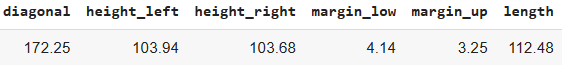
<!-- 1412 -->

In [24]:
df2 = pd.read_excel('Dataset_Uang.xlsx')
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [25]:
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - new_data['diagonal'].values[0])**2
    + (df2['height_left'] - new_data['height_left'].values[0])**2
    + (df2['height_right'] - new_data['height_right'].values[0])**2
    + (df2['margin_low'] - new_data['margin_low'].values[0])**2
    + (df2['margin_up'] - new_data['margin_up'].values[0])**2
    + (df2['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


**1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi**

In [26]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df2)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

**2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)**

In [28]:
# Mengurutkan data dari kecil ke besar
sorted = df2.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df2)))

# Menentukan data terdekat
data_terdekat = sorted.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


**3. Tentukan apa hasil prediksinya berdasarkan label terbanyak**

In [29]:
print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))
     

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Maghfira Khansa Aulia

> Nim :2109116013


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)



# TEMA : Perbankan 

#**JUDUL** : **Bank Customer Churn Dataset**

#**Business Understanding**

Setiap bank selalu berusaha untuk mempertahankan nasabah agar tidak  memilih bank lain dan menjadikan menarik mereka untuk memilih bank ABC Multinational dan menjadikan nasabah tetap.

Di bawah ini adalah data nasabah pemegang rekening di ABC Multinational Bank dan tujuan dari data tersebut adalah memprediksi Churn Pelanggan.




#**Data Understanding**



**Collect Initial Data**

Data para pelanggan Bank Multinational didapatkan dari website resmi kaggle dan dapat dilihat pada link berikut : https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download


In [3]:
# Import data ke dalam sebuah dataframe dengan nama df3

import pandas as pd
df3 = pd.read_csv('Bank Customer Churn Prediction.csv')

**Describe Data**

Dataset yang digunakan memiliki 10000 baris data nasabah pada Bank ABC Multinational, yang tersusun dalam 12 kolom.

Dalam bagian ini, akan ditampilkan seluruh data pelanggan beserta deskripsi dari setiap kolom yang berguna. Selanjutnya, data tersebut akan divisualisasikan agar dapat lebih mudah dipahami.

In [4]:
# Menampilkan data nasabah bank Multistate ABC
df3

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
print("Daftar kolom yang ada pada dataframe :")
for col in df3.columns:
  print(col)

Daftar kolom yang ada pada dataframe :
customer_id
credit_score
country
gender
age
tenure
balance
products_number
credit_card
active_member
estimated_salary
churn


**Penjelasan Kolom**

customer_id : Nomor Rekening yang dimiliki masing masing Nasabah

credit_score :Skor kredit yang dimiliki masing masing Nasabah

country : Negara Tempat Tinggal Nasabah

gender : Jenis kelamin Nasabah

age : Umur Nasabah

tenure : Dari berapa tahun Nasabah telah memiliki acc bank di ABC Bank

balance : Saldo Akun Nasabah

products_number : Jumlah Produk dari Bank

credit_card : Apakah Nasabah memiliki kartu kredit?

active_member : Apakah Nasabah aktif sebagai Anggota Bank ?

estimated_salary : Perkiraan gaji Nasabah

churn : digunakan sebagai target. 1 jika klien telah meninggalkan bank selama beberapa periode atau 0 jika dia belum.

**Explore Data**

Beberapa kolom data akan divisualisasikan untuk menjelajahi data lebih lanjut lagi (menggunakan scatterplot dan countplot)

Pada countplot, beberapa kolom akan dibandingkan secara satu - persatu dengan kolom 'active_member' untuk melihat apakah hubungan antara kolom - kolom ini berbanding lurus dengan kolom 'active_member' atau sebaliknya

<Axes: xlabel='tenure', ylabel='count'>

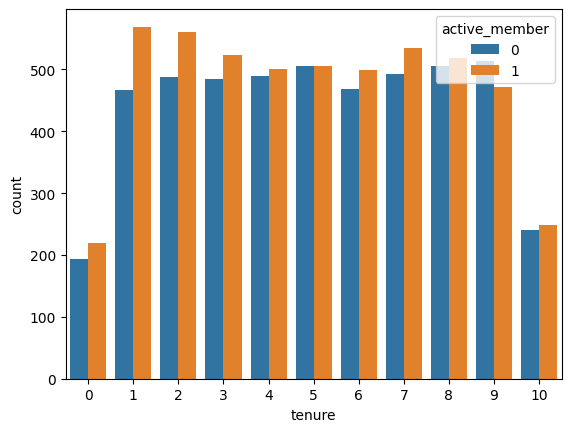

In [11]:
import seaborn as sns

sns.countplot(data=df3,x="tenure",hue="active_member")

Baris horizontal atau sumbu x merupakan baris jumlah dari berapa tahun Nasabah telah memiliki acc bank di ABC Bank dari skala 1 -10.


<Axes: xlabel='credit_card', ylabel='count'>

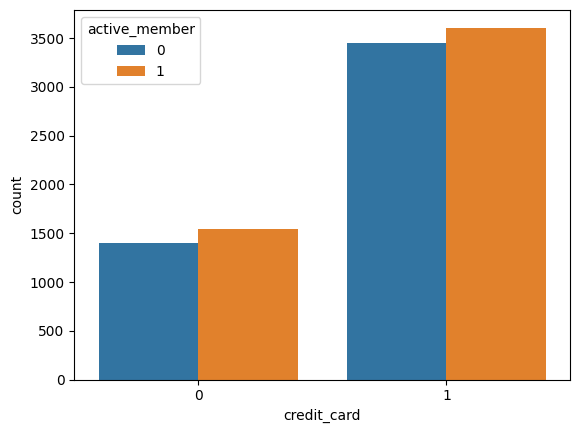

In [12]:
sns.countplot(data=df3,x="credit_card",hue="active_member")

Baris horizontal atau sumbu x merupakan baris nasabah yang memiliki kartu kredit dari skala 1 - 2. 

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


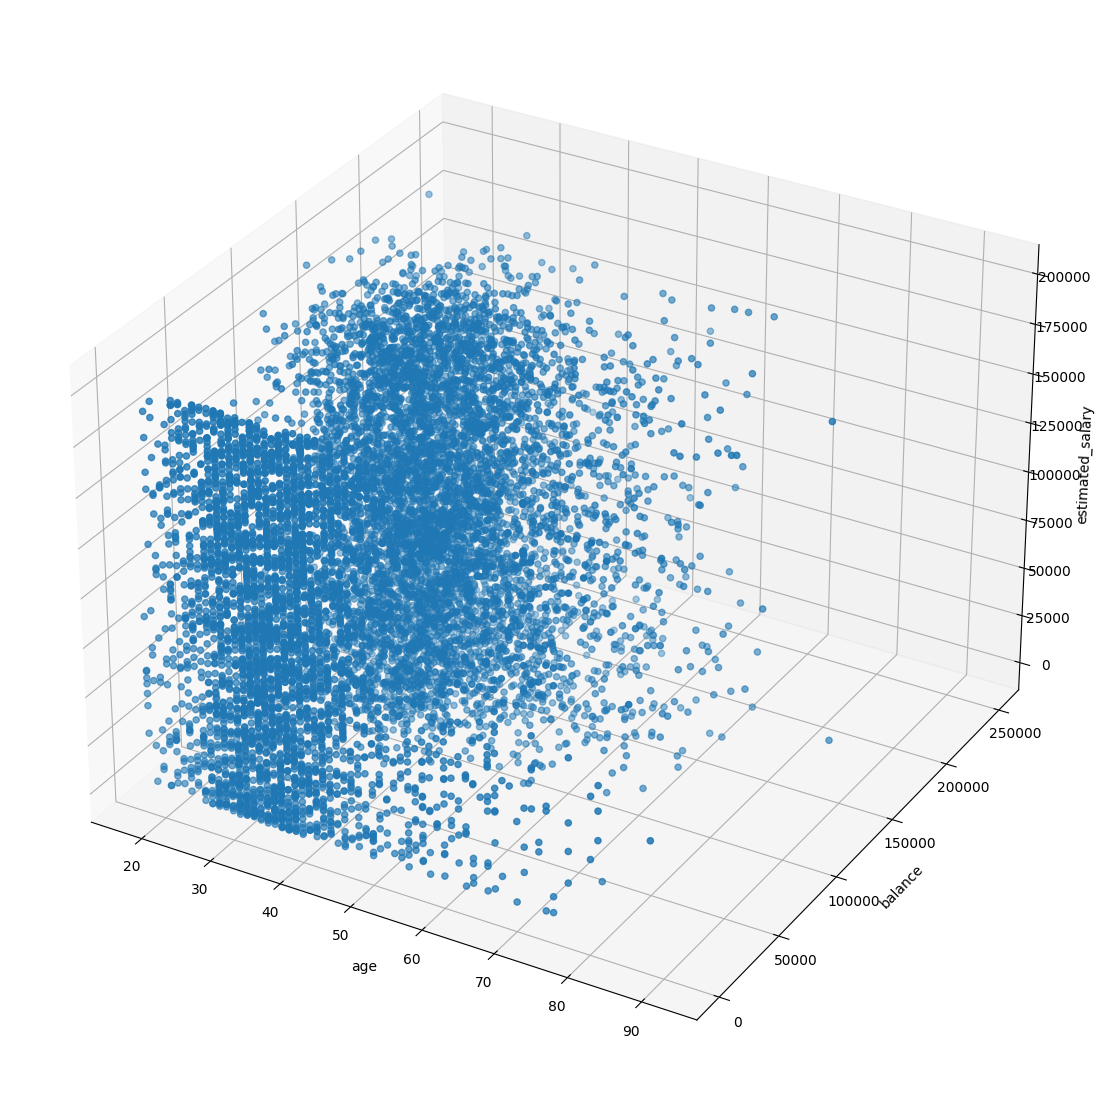

In [16]:
import matplotlib.pyplot as plot

plot.figure(figsize=(15,14))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(df3['age'],df3['balance'],df3['estimated_salary'])

axes.set_xlabel('age')
axes.set_ylabel('balance')
axes.set_zlabel('estimated_salary')
plot.show()

**Verify Data Quality**

Dilakukan verifikasi kualitas data dengan cara memeriksa data berdasarkan beberapa indikator kualitas data, seperti kelengkapan data, validitas data dan duplikasi data.





**Validitas Data**

Data - data yang tercakup pada dataframe di atas valid, karena berdasarkan sumber datanya, data tersebut adalah data nasabah yang tercatat pada saat kampanye dilakukan sehingga data - data tersebut cukup untuk digunakan dalam proyek ini

**Duplikasi Data**

In [17]:
is_duplicated = df3.duplicated().any()

print("Status Duplikasi :",is_duplicated)

Status Duplikasi : False


Status Duplikasi :
Berdasarkan output di atas, data - data yang pada dataframe tidak memiliki duplikasi data, didukung oleh adanya kolom ID atau identifikasi nasabah agar data - data mereka tidak terlantar, tertukar, terduplikasi, dan masalah lainnya.

**Data Preparation**



**Select Data**

In [15]:
df3 = pd.read_csv('Bank Customer Churn Prediction.csv')


Dataset yang digunakan pada tahap ini adalah sama, yaitu menggunakan dataset Bank ABC Multinational

**Clean Data**

In [16]:
df3.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Berdasarkan output di atas, diketahui bahwa tidak terdapat nilai kosong atau nilai N/A pada dataframe sehingga dapat disimpulkan bahwa data sudah clean dan lanjut ke proses Transform Data

**Transform Data**

In [13]:
df3 = pd.get_dummies(df3)
print(df3)

      customer_id  credit_score  age  tenure    balance  products_number  \
0        15634602           619   42       2       0.00                1   
1        15647311           608   41       1   83807.86                1   
2        15619304           502   42       8  159660.80                3   
3        15701354           699   39       1       0.00                2   
4        15737888           850   43       2  125510.82                1   
...           ...           ...  ...     ...        ...              ...   
9995     15606229           771   39       5       0.00                2   
9996     15569892           516   35      10   57369.61                1   
9997     15584532           709   36       7       0.00                1   
9998     15682355           772   42       3   75075.31                2   
9999     15628319           792   28       4  130142.79                1   

      credit_card  active_member  estimated_salary  churn  country_France  \
0         

**Data Reduction**

In [19]:
data = df3.drop(columns=['credit_score','country','gender','products_number'])
data
     

,customer_id,age,tenure,balance,credit_card,active_member,estimated_salary,churn
0,15634602,42,2,0.00,1,1,101348.88,1
1,15647311,41,1,83807.86,0,1,112542.58,0
2,15619304,42,8,159660.80,1,0,113931.57,1
3,15701354,39,1,0.00,0,0,93826.63,0
4,15737888,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,15606229,39,5,0.00,1,0,96270.64,0
9996,15569892,35,10,57369.61,1,1,101699.77,0
9997,15584532,36,7,0.00,0,1,42085.58,1
9998,15682355,42,3,75075.31,1,0,92888.52,1


Berdasarkan analisis yang dilakukan, terdapat beberapa kolom pada dataset yang tidak terlalu diperlukan untuk mengurangi kompleksitas dan meningkatkan efisiensi analisis. Kolom - kolom tersebut ialah credit_score,country, gender, products_number

**Slicing Data**

In [20]:
data = data.iloc[0:501,:]
data

,customer_id,age,tenure,balance,credit_card,active_member,estimated_salary,churn
0,15634602,42,2,0.00,1,1,101348.88,1
1,15647311,41,1,83807.86,0,1,112542.58,0
2,15619304,42,8,159660.80,1,0,113931.57,1
3,15701354,39,1,0.00,0,0,93826.63,0
4,15737888,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
496,15662403,32,6,169089.38,1,0,101057.95,0
497,15733616,40,5,80613.93,1,1,142838.64,0
498,15591995,26,8,121581.56,1,1,127059.04,0
499,15677020,58,8,0.00,0,1,116503.92,1


Dataset yang telah direduksi selanjutnya akan dipotong / slicing data, yaitu memilih sebagian kecil atau subset dari dataset yang digunakan untuk analisis atau pemodelan dengan tujuan untuk memudahkan analisis dan pemodelan dengan mengurangi kompleksitas dataset dan fokus pada variabel atau fitur yang paling relevan atau penting.

**Split Data**

In [21]:
from sklearn.model_selection import train_test_split
x = df3.drop('active_member',axis=1)
y = df3['active_member']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Data Latih Yang Akan Digunakan :\n",x_train)
print("Data Uji Yang Akan Digunakan :\n",x_test)

Data Latih Yang Akan Digunakan :
       customer_id  credit_score  country  gender  age  tenure    balance  \
9069     15777459           619    Spain  Female   32       4  175406.13   
2603     15583049           643  Germany  Female   34       7  160426.07   
7738     15768746           561   France    Male   33       6       0.00   
1579     15743976           618  Germany    Male   41       8   37702.79   
5058     15682322           714   France    Male   37       9  148466.93   
...           ...           ...      ...     ...  ...     ...        ...   
5734     15596647           768   France    Male   54       8   69712.74   
5191     15681075           682   France  Female   58       1       0.00   
5390     15573851           735   France  Female   38       1       0.00   
860      15807663           667   France    Male   43       8  190227.46   
7270     15706268           697  Germany    Male   51       1  147910.30   

      products_number  credit_card  estimated_salary 